#Define and import library

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing,neighbors,svm,tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, f1_score

#Define function
for convert word to number 

In [ ]:
def convert_text_to_num(x):
    set_x=set(x)
    w_index={}
    for i,w in enumerate(set_x):
        w_index[w]=i
    x=x.replace(w_index)
    return x

#Data 
**Income classification**

Prediction task is to determine whether a person makes over 50K a year.

you can [download](https://www.kaggle.com/lodetomasi1995/income-classification) it from kaggle 

data details :

`age`: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

`fnlwgt`: continuous.

`education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

`education-num`: continuous.

`marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

`occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

`relationship:` Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

`race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

`sex`: Female, Male.

`capital-gain`: continuous.

`capital-loss`: continuous.

`hours-per-week`: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada,Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

`income`: <=50k , >50k

In [ ]:
data = pd.read_csv("/content/income_evaluation.csv")

Rename the columns to get rid of spaces at the beginning of words

In [ ]:
data.rename(columns={'age':'Age',' workclass':'Workclass',' fnlwgt':'Fnlwgt',' education-num':'Education-num', ' marital-status':'Marital-status',' relationship':'Relationship',' race':'Race',' sex':'Sex',' capital-gain':'Capital-gain',' capital-loss':'Capital-loss',' occupation':'Occupation', ' hours-per-week':'Hours-per-week',' native-country':'Native_country',' income':'Income'},inplace=True)
data

,Age,Workclass,Fnlwgt,education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The data contains `2398` missing values `?` that will be ignored from the database

In [ ]:
data = data[data.Workclass != " ?"]
data = data[data.Occupation != " ?"]
data = data[data.Native_country != " ?"]
data

,Age,Workclass,Fnlwgt,education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


convert data in income column to `1 for <=50K` and `0 for >50K`

In [ ]:
incomes = {' <=50K':1, ' >50K':0 }
data.Income.replace(to_replace=incomes,inplace=True)
data.Income

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: Income, Length: 30162, dtype: int64

#First test

 - Drop `education` columns
 - convert text to number 

##Preparation of data



Drop `education` columns because it is similar to the numeric data in the column `Education-num`

where each value in the column **education** corresponds to an integer number in the column **Education-num**

In [ ]:
data_1 = data.drop([" education"],axis=1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   Fnlwgt          30162 non-null  int64 
 3   Education-num   30162 non-null  int64 
 4   Marital-status  30162 non-null  object
 5   Occupation      30162 non-null  object
 6   Relationship    30162 non-null  object
 7   Race            30162 non-null  object
 8   Sex             30162 non-null  object
 9   Capital-gain    30162 non-null  int64 
 10  Capital-loss    30162 non-null  int64 
 11  Hours-per-week  30162 non-null  int64 
 12  Native_country  30162 non-null  object
 13  Income          30162 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


convert text to number using `convert_text_to_num function`

In [ ]:
data_1.iloc[:,1] = convert_text_to_num(data_1.iloc[:,1])
data_1.iloc[:,8] = convert_text_to_num(data_1.iloc[:,8])
data_1.iloc[:,5] = convert_text_to_num(data_1.iloc[:,5])
data_1.iloc[:,6] = convert_text_to_num(data_1.iloc[:,6])
data_1.iloc[:,7] = convert_text_to_num(data_1.iloc[:,7])
data_1.iloc[:,4] = convert_text_to_num(data_1.iloc[:,4])
data_1.iloc[:,12] = convert_text_to_num(data_1.iloc[:,12])
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30162 non-null  int64
 1   Workclass       30162 non-null  int64
 2   Fnlwgt          30162 non-null  int64
 3   Education-num   30162 non-null  int64
 4   Marital-status  30162 non-null  int64
 5   Occupation      30162 non-null  int64
 6   Relationship    30162 non-null  int64
 7   Race            30162 non-null  int64
 8   Sex             30162 non-null  int64
 9   Capital-gain    30162 non-null  int64
 10  Capital-loss    30162 non-null  int64
 11  Hours-per-week  30162 non-null  int64
 12  Native_country  30162 non-null  int64
 13  Income          30162 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


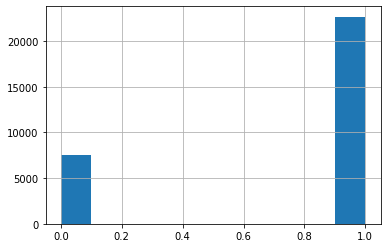

In [ ]:
data_1.Income.hist()

Store data containing (0) in a variable ff0

In [ ]:
ff0 = data_1[data_1.Income != 1]

- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`24129`) for training and (`6033`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
np.random.seed(42)
x= np.array(data_1.iloc[:,:13])
x_norm = preprocessing.StandardScaler().fit_transform(x) 
y=np.array(data_1.iloc[:,13])
x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((24129, 13), (6033, 13), (24129,), (6033,))

Empty array to store the scores

In [ ]:
scores = [] 

##Model

---------------------------------------------------

###1- SVM Model

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=10,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)
accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores.append(scores_dict)

----------------------------------------------------------------------

###2- Random Forest Classifier Molde

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=17)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores.append(scores_dict)

------------------------------------------------------------------------

###3- K Neighbors Classifier Model

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=17,)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores.append(scores_dict)

-----------------------------------------------

###4- Decision Tree Classifier Model

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=8,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores.append(scores_dict)


-----------------------------------------------

##Result

Collect the results and print them in the form of a table

In [ ]:
scores_df = pd.DataFrame()
scores_df = scores_df.append(scores)
scores_df.rename(index={0: "svm", 1: "random_forest", 2: "Knn",3: "Tree_dec"})


,accuracy,precision,recall,f1
svm,0.804409,0.843975,0.907305,0.874495
random_forest,0.863086,0.882038,0.943942,0.911940
Knn,0.840544,0.870921,0.924741,0.897024
Tree_dec,0.848831,0.861106,0.952328,0.904423


-----------------------------------


#Second test


 - Drop `education` columns
 - convert text to number 
 - Add more (0) income

##Preparation of data
Add more (0) income value for database to make the (0,1) value equal

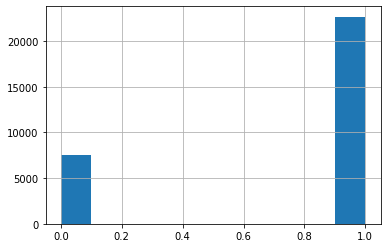

In [ ]:
data_1.Income.hist()

In [ ]:
data_2 = data_1.append(ff0)
data_2 = data_2.append(ff0)

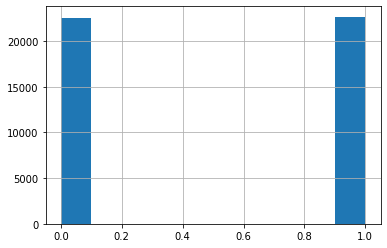

In [ ]:
data_2.Income.hist()



---





- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`36142`) for training and (`9036`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
x= np.array(data_2.iloc[:,:13])
x_norm = preprocessing.StandardScaler().fit_transform(x)
y=np.array(data_2.iloc[:,13])
x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((36142, 13), (9036, 13), (36142,), (9036,))

Empty array to store the scores

In [ ]:
scores_2 = []

##Model

----------------------------------------------------------------------

###1- SVM Model

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=15,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)
accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_2 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_2.append(scores_dict_2)


----------------------------------------------------------------------

###2- Random Forest Classifier Molde


------------------------------------------------------------------------

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=80)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
# Create scores dictionary
scores_dict_2 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_2.append(scores_dict_2)


------------------------------------------------------------------------

###3- K Neighbors Classifier Model

-----------------------------------------------

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=19)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_2 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_2.append(scores_dict_2)

-----------------------------------------------

###4- Decision Tree Classifier Model

-----------------------------------------------

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=50,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_2 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_2.append(scores_dict_2)

##Result

Collect the results and print them in the form of a table

In [ ]:
scores_df2 = pd.DataFrame()
scores_df2 = scores_df2.append(scores_2)
scores_df2.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.896304,0.943266,0.843964,0.890856
Random_forest,0.935812,0.989591,0.881262,0.890856
Knn,0.808433,0.833492,0.772236,0.801695
Tree_dec,0.921979,0.983325,0.858972,0.916951


------------------------------------------------------------

#Third test

 - Drop `education` , `Fnlwgt` columns
 - convert text to number 

##Preparation of data


In [ ]:
data_3 = data.drop([" education","Fnlwgt"],axis=1)
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   Education-num   30162 non-null  int64 
 3   Marital-status  30162 non-null  object
 4   Occupation      30162 non-null  object
 5   Relationship    30162 non-null  object
 6   Race            30162 non-null  object
 7   Sex             30162 non-null  object
 8   Capital-gain    30162 non-null  int64 
 9   Capital-loss    30162 non-null  int64 
 10  Hours-per-week  30162 non-null  int64 
 11  Native_country  30162 non-null  object
 12  Income          30162 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [ ]:
data_3.iloc[:,1] = convert_text_to_num(data_3.iloc[:,1])
data_3.iloc[:,11] = convert_text_to_num(data_3.iloc[:,11])
data_3.iloc[:,5] = convert_text_to_num(data_3.iloc[:,5])
data_3.iloc[:,6] = convert_text_to_num(data_3.iloc[:,6])
data_3.iloc[:,7] = convert_text_to_num(data_3.iloc[:,7])
data_3.iloc[:,4] = convert_text_to_num(data_3.iloc[:,4])
data_3.iloc[:,3] = convert_text_to_num(data_3.iloc[:,3])
data_3

,Age,Workclass,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Income
0,39,5,13,2,10,5,1,1,2174,0,40,6,1
1,50,0,13,0,11,2,1,1,0,0,13,6,1
2,38,4,9,3,3,5,1,1,0,0,40,6,1
3,53,4,7,0,3,2,0,1,0,0,40,6,1
4,28,4,13,0,1,3,0,0,0,0,40,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,0,0,3,1,0,0,0,38,6,1
32557,40,4,9,0,2,2,1,1,0,0,40,6,0
32558,58,4,9,1,10,0,1,0,0,0,40,6,1
32559,22,4,9,2,10,1,1,1,0,0,20,6,1


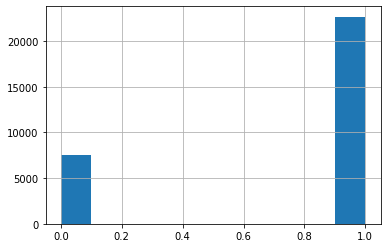

In [ ]:
data_3.Income.hist()

- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`24129`) for training and (`6033`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
np.random.seed(42)
x= np.array(data_3.iloc[:,:12])
x_norm = preprocessing.StandardScaler().fit_transform(x)
y=np.array(data_3.iloc[:,12])
x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((24129, 12), (6033, 12), (24129,), (6033,))

Empty array to store the scores

In [ ]:
scores_3 = []

##Model

---------------------------------------------------

###1- SVM Model

----------------------------------------------------------------------

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=10,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_3 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_3.append(scores_dict_3)

----------------------------------------------------------------------

###2- Random Forest Classifier Molde

------------------------------------------------------------------------

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=33)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_3 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_3.append(scores_dict_3)

------------------------------------------------------------------------

###3- K Neighbors Classifier Model

-----------------------------------------------

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=17,)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_3 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_3.append(scores_dict_3)

-----------------------------------------------

###4- Decision Tree Classifier Model

-----------------------------------------------

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=13,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_3 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_3.append(scores_dict_3)

##Result

Collect the results and print them in the form of a table

In [ ]:
scores_df3 = pd.DataFrame()
scores_df3 = scores_df3.append(scores_3)
scores_df3.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.829438,0.862376,0.919665,0.890099
Random_forest,0.850655,0.883883,0.922313,0.902689
Knn,0.842367,0.876525,0.919665,0.897577
Tree_dec,0.846677,0.884435,0.915471,0.899686


------------------------------------------------

#Fourth test

 - Drop `education` , `Fnlwgt` columns
 - convert text to number 
 - Add more (0) income

##Preparation of data
Add more (0) income value for database to make the (0,1) value

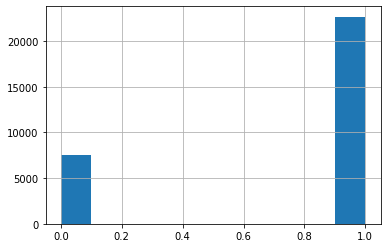

In [ ]:
data_3.Income.hist()

In [ ]:
data_4 = data_3.append(ff0)
data_4 = data_4.append(ff0)

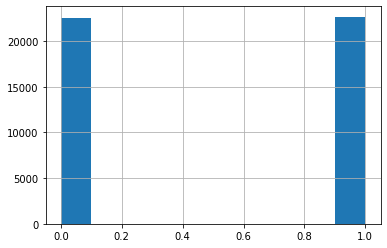

In [ ]:
data_4.Income.hist()

- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`36142`) for training and (`9036`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
np.random.seed(42)
x= np.array(data_4.iloc[:,:12])
x_norm = preprocessing.StandardScaler().fit_transform(x)
y=np.array(data_4.iloc[:,12])
x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((36142, 12), (9036, 12), (36142,), (9036,))

In [ ]:
scores_4 = []

##Model

----------------------------------------------------------------------

###1- SVM Model

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=10,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_4 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_4.append(scores_dict_4)

----------------------------------------------------------------------

###2- Random Forest Classifier Molde

------------------------------------------------------------------------

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=36)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_4 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_4.append(scores_dict_4)

------------------------------------------------------------------------

###3- K Neighbors Classifier Model

-----------------------------------------------

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=15,)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_4 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_4.append(scores_dict_4)

-----------------------------------------------

###4- Decision Tree Classifier Model

-----------------------------------------------

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=40,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_4 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_4.append(scores_dict_4)

Collect the results and print them in the form of a table

##Result

In [ ]:
scores_df4 = pd.DataFrame()
scores_df4 = scores_df4.append(scores_4)
scores_df4.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.870518,0.916274,0.816376,0.863445
Random_forest,0.917773,0.966963,0.865593,0.913474
Knn,0.816180,0.842809,0.778636,0.809453
Tree_dec,0.906485,0.972322,0.837343,0.899798


---

---



---



---



#Fivth test

 - Drop `education` columns
 - convert text to number 
 - normalizing by /max

##Preparation of data



Drop `education` columns because it is similar to the numeric data in the column `Education-num`

where each value in the column **education** corresponds to an integer number in the column **Education-num**

In [ ]:
data_5 = data.drop([" education"],axis=1)

convert text to number using `convert_text_to_num function`

In [ ]:
data_5.iloc[:,1] = convert_text_to_num(data_5.iloc[:,1])
data_5.iloc[:,8] = convert_text_to_num(data_5.iloc[:,8])
data_5.iloc[:,5] = convert_text_to_num(data_5.iloc[:,5])
data_5.iloc[:,6] = convert_text_to_num(data_5.iloc[:,6])
data_5.iloc[:,7] = convert_text_to_num(data_5.iloc[:,7])
data_5.iloc[:,4] = convert_text_to_num(data_5.iloc[:,4])
data_5.iloc[:,12] = convert_text_to_num(data_5.iloc[:,12])
data_5

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Income
0,39,5,77516,13,2,10,5,1,1,2174,0,40,6,1
1,50,0,83311,13,0,11,2,1,1,0,0,13,6,1
2,38,4,215646,9,3,3,5,1,1,0,0,40,6,1
3,53,4,234721,7,0,3,2,0,1,0,0,40,6,1
4,28,4,338409,13,0,1,3,0,0,0,0,40,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,0,0,3,1,0,0,0,38,6,1
32557,40,4,154374,9,0,2,2,1,1,0,0,40,6,0
32558,58,4,151910,9,1,10,0,1,0,0,0,40,6,1
32559,22,4,201490,9,2,10,1,1,1,0,0,20,6,1


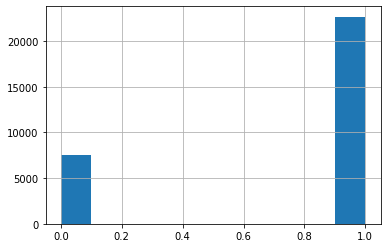

In [ ]:
data_5.Income.hist()

- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`24129`) for training and (`6033`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
x= np.array(data_5.iloc[:,:13])
y=np.array(data_5.iloc[:,13])

x_norm = x/x.max()

x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((24129, 13), (6033, 13), (24129,), (6033,))

Empty array to store the scores

In [ ]:
scores_5 = [] 

##Model

start prediction using sklearn models

---------------------------------------------------

###1- SVM Model

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=10,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)
accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict5 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_5.append(scores_dict5)

----------------------------------------------------------------------

###2- Random Forest Classifier Molde

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=16)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict5 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_5.append(scores_dict5)

------------------------------------------------------------------------

###3- K Neighbors Classifier Model

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=24,)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict5 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_5.append(scores_dict5)

-----------------------------------------------

###4- Decision Tree Classifier Model

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=8,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict5 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_5.append(scores_dict5)

-----------------------------------------------

##Result

In [ ]:
scores_df5 = pd.DataFrame()
scores_df5 = scores_df5.append(scores_5)
scores_df5.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.772750,0.767797,0.999779,0.868565
Random_forest,0.862092,0.880321,0.944825,0.911433
Knn,0.791977,0.791875,0.980799,0.876269
Tree_dec,0.848666,0.860934,0.952328,0.904328


#Sixth test

 - Drop `education` , `Fnlwgt` columns
 - convert text to number 
 - normalizing by /max

##Preparation of data


In [ ]:
data_3 = data.drop([" education","Fnlwgt"],axis=1)
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   Education-num   30162 non-null  int64 
 3   Marital-status  30162 non-null  object
 4   Occupation      30162 non-null  object
 5   Relationship    30162 non-null  object
 6   Race            30162 non-null  object
 7   Sex             30162 non-null  object
 8   Capital-gain    30162 non-null  int64 
 9   Capital-loss    30162 non-null  int64 
 10  Hours-per-week  30162 non-null  int64 
 11  Native_country  30162 non-null  object
 12  Income          30162 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [ ]:
data_3.iloc[:,1] = convert_text_to_num(data_3.iloc[:,1])
data_3.iloc[:,11] = convert_text_to_num(data_3.iloc[:,11])
data_3.iloc[:,5] = convert_text_to_num(data_3.iloc[:,5])
data_3.iloc[:,6] = convert_text_to_num(data_3.iloc[:,6])
data_3.iloc[:,7] = convert_text_to_num(data_3.iloc[:,7])
data_3.iloc[:,4] = convert_text_to_num(data_3.iloc[:,4])
data_3.iloc[:,3] = convert_text_to_num(data_3.iloc[:,3])
data_3

,Age,Workclass,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Income
0,39,5,13,2,10,5,1,1,2174,0,40,6,1
1,50,0,13,0,11,2,1,1,0,0,13,6,1
2,38,4,9,3,3,5,1,1,0,0,40,6,1
3,53,4,7,0,3,2,0,1,0,0,40,6,1
4,28,4,13,0,1,3,0,0,0,0,40,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,0,0,3,1,0,0,0,38,6,1
32557,40,4,9,0,2,2,1,1,0,0,40,6,0
32558,58,4,9,1,10,0,1,0,0,0,40,6,1
32559,22,4,9,2,10,1,1,1,0,0,20,6,1


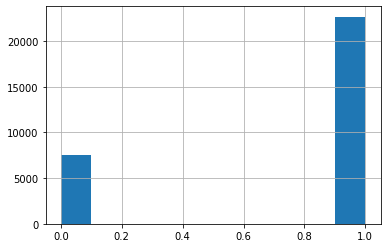

In [ ]:
data_3.Income.hist()

- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`24129`) for training and (`6033`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
np.random.seed(42)
y=np.array(data_3.iloc[:,12])
x= np.array(data_3.iloc[:,:12])
x_norm =x/x.max()

x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((24129, 12), (6033, 12), (24129,), (6033,))

Empty array to store the scores

In [ ]:
scores_6 = []

##Model

---------------------------------------------------

###1- SVM Model

----------------------------------------------------------------------

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=19,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_6 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_6.append(scores_dict_6)


----------------------------------------------------------------------

###2- Random Forest Classifier Molde

------------------------------------------------------------------------

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=15)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_6 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_6.append(scores_dict_6)


------------------------------------------------------------------------

###3- K Neighbors Classifier Model

-----------------------------------------------

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=17,)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_6 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_6.append(scores_dict_6)


-----------------------------------------------

###4- Decision Tree Classifier Model

-----------------------------------------------

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=6,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_6 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_6.append(scores_dict_6)


##Result

In [ ]:
scores_df6 = pd.DataFrame()
scores_df6 = scores_df6.append(scores_6)
scores_df6.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.791812,0.804765,0.954315,0.873183
Random_forest,0.861263,0.879885,0.944162,0.910891
Knn,0.848500,0.880657,0.923416,0.901530
Tree_dec,0.850986,0.859177,0.958729,0.906227


#Seven test


 - Drop `education` columns
 - convert text to number 
 - Add more (0) income
 - normalizing by /max

##Preparation of data
Add more (0) income value for database to make the (0,1) value

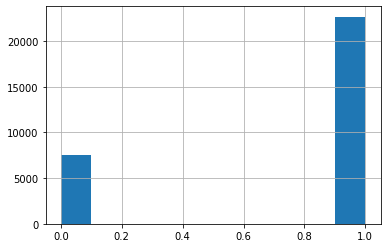

In [ ]:
data_1.Income.hist()

In [ ]:
data_7 = data_1.append(ff0)
data_7 = data_7.append(ff0)

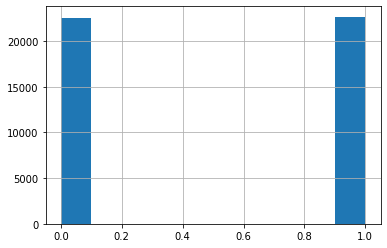

In [ ]:
data_2.Income.hist()



- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`36142`) for training and (`9036`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
x.max()

99999

In [ ]:
x= np.array(data_7.iloc[:,:13])
x_norm = x/x.max()
y=np.array(data_7.iloc[:,13])
x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((36142, 13), (9036, 13), (36142,), (9036,))

Empty array to store the scores

In [ ]:
scores_7 = []

##Model

Start prediction using sklearn models

----------------------------------------------------------------------

###1- SVM Model

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=10,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)
accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_7 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_7.append(scores_dict_7)

----------------------------------------------------------------------

### 2- Random Forest Classifier Molde

------------------------------------------------------------------------

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=39) #80,45
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
# Create scores dictionary
scores_dict_7 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_7.append(scores_dict_7)


------------------------------------------------------------------------

### 3- K Neighbors Classifier Model

-----------------------------------------------

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=19)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_7 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_7.append(scores_dict_7)

-----------------------------------------------

### 4- Decision Tree Classifier Model

-----------------------------------------------

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=35,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)
# Create scores dictionary
scores_dict_7 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}
# Append to scores array
scores_7.append(scores_dict_7)

##Result

Collect the results and print them in the form of a table

In [ ]:
scores_df7 = pd.DataFrame()
scores_df7 = scores_df7.append(scores_7)
scores_df7.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.586985,0.548395,0.999117,0.708118
Random_forest,0.935702,0.988861,0.881704,0.708118
Knn,0.649624,0.642514,0.679100,0.660300
Tree_dec,0.920761,0.980842,0.858751,0.915745


------------------------------------------------------------

#Eighth test

##Preparation of data



Drop `education` columns because it is similar to the numeric data in the column `Education-num`

where each value in the column **education** corresponds to an integer number in the column **Education-num**

convert text to number using `convert_text_to_num function`

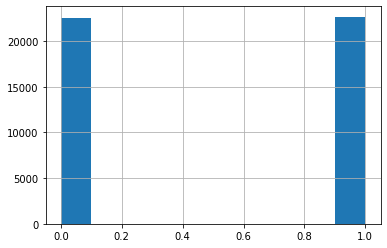

In [ ]:
data_8 = data_5.append(ff0)
data_8 = data_8.append(ff0)
data_8.Income.hist()


- Split data into `(x_strain,y_strain)` and `(x_stest,y_stest)`  
- normalize (x) data
- We take a sample of the data (`24129`) for training and (`6033`) for testing
- Set random seed to 42 for using NumPy

In [ ]:
x= np.array(data_8.iloc[:,:13])
y=np.array(data_8.iloc[:,13])

x_norm = x/x.max()

x_strain, x_stest, y_strain, y_stest = model_selection.train_test_split(x_norm,y, test_size=0.2, random_state=42,stratify=y)
x_strain.shape, x_stest.shape, y_strain.shape, y_stest.shape

((36142, 13), (9036, 13), (36142,), (9036,))

Empty array to store the scores

In [ ]:
scores_8 = [] 

##Model

start prediction using sklearn models

---------------------------------------------------

###1- SVM Model

In [ ]:
np.random.seed(42)
svm_model = svm.SVC(C=10,gamma=1)
svm_model.fit(x_strain,y_strain)

y_pred = svm_model.predict(x_stest)
accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict8 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_8.append(scores_dict8)

----------------------------------------------------------------------

###2- Random Forest Classifier Molde

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=16)
rf_model.fit(x_strain,y_strain)
y_pred = rf_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict8 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_8.append(scores_dict8)

------------------------------------------------------------------------

###3- K Neighbors Classifier Model

In [ ]:
Knn_model =neighbors.KNeighborsClassifier(n_neighbors=24,)
Knn_model.fit(x_strain, y_strain)
y_pred=Knn_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict8 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_8.append(scores_dict8)

-----------------------------------------------

###4- Decision Tree Classifier Model

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=8,random_state=42,)
tree_model.fit(x_strain, y_strain)
y_pred = tree_model.predict(x_stest)

accuracy = metrics.accuracy_score(y_stest, y_pred)
precision = metrics.precision_score(y_stest, y_pred)
recall = metrics.recall_score(y_stest, y_pred)
f1 = metrics.f1_score (y_stest,y_pred)

# Create scores dictionary
scores_dict8 = {"accuracy": accuracy, "precision": precision, "recall": recall , "f1" : f1}

# Append to scores array
scores_8.append(scores_dict8)

-----------------------------------------------

##Result

In [ ]:
scores_df8 = pd.DataFrame()
scores_df8 = scores_df8.append(scores_8)
scores_df8.rename(index= {0: "Svm", 1: "Random_forest", 2: "Knn",3: "Tree_dec"})

,accuracy,precision,recall,f1
Svm,0.586985,0.548395,0.999117,0.708118
Random_forest,0.879371,0.929374,0.821894,0.872335
Knn,0.635569,0.632890,0.650629,0.641637
Tree_dec,0.824701,0.849917,0.789892,0.818806


# end